In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as sklm

In [2]:
import prepare
import acquire


# Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
# df.head()
train, validate, test = prepare.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [4]:
train.survived.value_counts() # Baseline = everyone dies.


0    302
1    196
Name: survived, dtype: int64

In [5]:
train.survived.mode()[0]

0

In [6]:
train['model_baseline'] = train.survived.mode()[0]
train.model_baseline.head()

689    0
84     0
738    0
441    0
643    0
Name: model_baseline, dtype: int64

In [7]:
pd.DataFrame(classification_report(train.survived, train.model_baseline, output_dict=True))

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0,1,accuracy,macro avg,weighted avg
precision,0.606426,0.0,0.606426,0.303213,0.367752
recall,1.000000,0.0,0.606426,0.500000,0.606426
f1-score,0.755000,0.0,0.606426,0.377500,0.457851
support,302.000000,196.0,0.606426,498.000000,498.000000


In [8]:
1- train.survived.mean() #We can just predict accuracy this way

0.606425702811245

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [35]:
def split_x_y(df, target, features):
    x = df[features]
    y = df[target]
    return x, y

In [9]:
y_train = train.survived
x_train = train[['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']]
x_train.head()

,pclass,sex_male,fare,alone,embark_town_Queenstown,embark_town_Southampton
689,1,0,211.3375,0,0,1
84,2,0,10.5000,1,0,1
738,3,1,7.8958,1,0,1
441,3,1,9.5000,1,0,1
643,3,1,56.4958,1,0,1


In [10]:
tree = DecisionTreeClassifier(max_depth = 3)

In [11]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
tree.classes_

array([0, 1], dtype=int64)

In [13]:
print(
    export_text(decision_tree=tree, feature_names=x_train.columns.tolist())
)

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.11
|   |   |   |--- class: 0
|   |   |--- fare >  26.11
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- class: 0



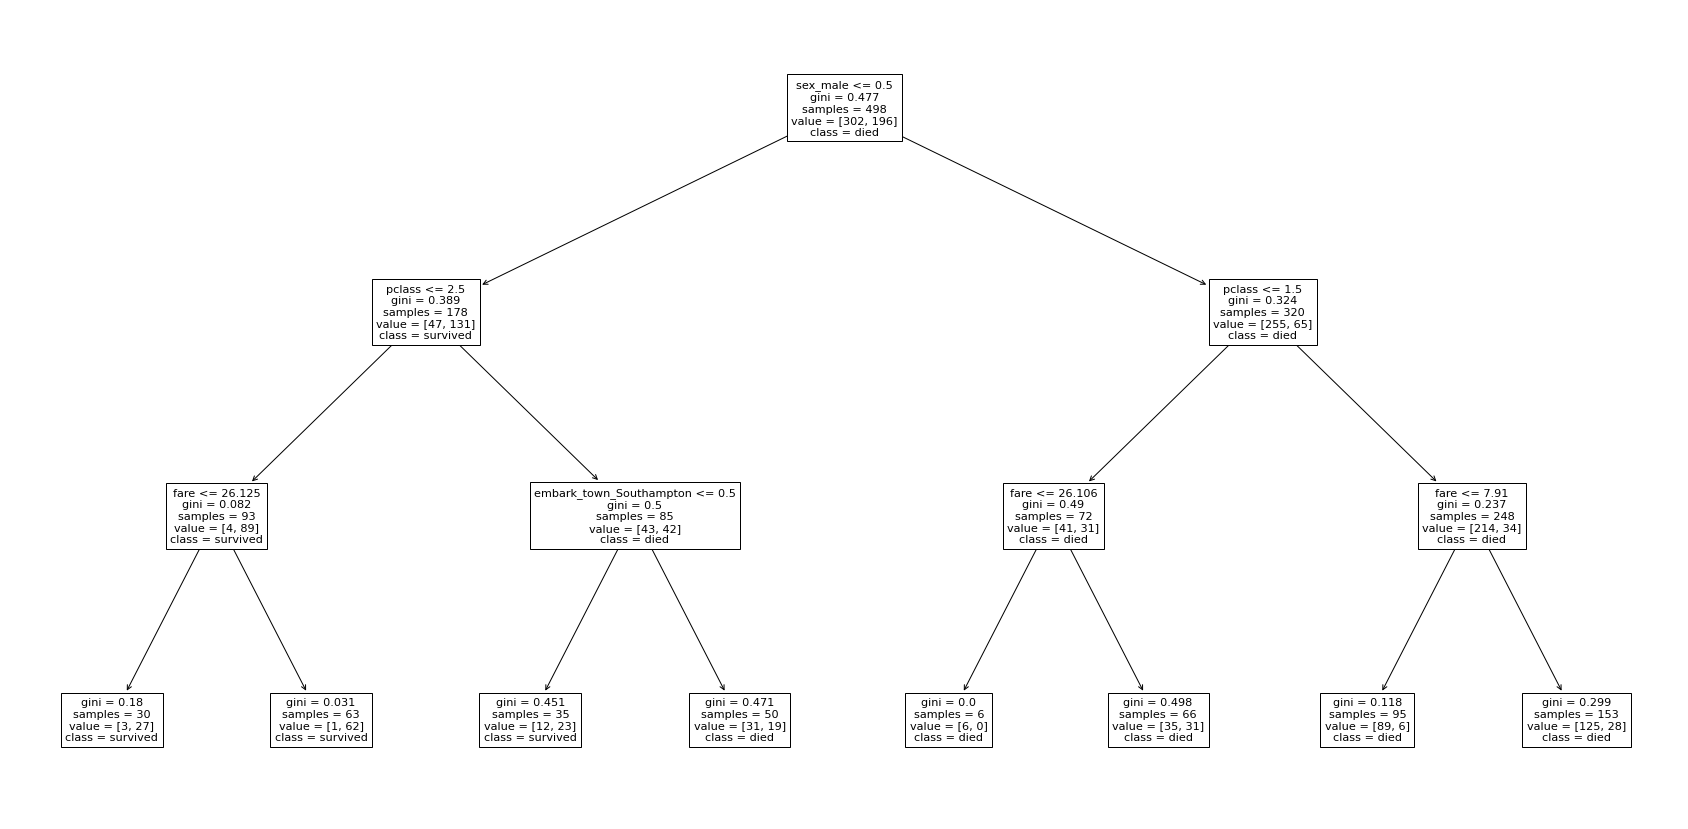

In [14]:
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=x_train.columns, class_names=['died','survived'])
plt.show()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [15]:
predictions = tree.predict(x_train)
actual = y_train
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       302
           1       0.88      0.57      0.69       196

    accuracy                           0.80       498
   macro avg       0.82      0.76      0.77       498
weighted avg       0.81      0.80      0.79       498



In [16]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,286,16
1,84,112


In [17]:
def get_tn_fp_fn_tp_from_confusion_matrix(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tn, fp, fn, tp

In [18]:
tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
tn, fp, fn, tp


(286, 16, 84, 112)

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [26]:
score = {
        'accuracy' : sklm.accuracy_score(actual, predictions) ,
        'true_positive_rate' : tp/(tp+fp) ,
        'false_positive_rate' : fp/(tp+fp) ,
        'true_negative_rate' : tn/(tn+fn) ,
        'false_negative_rate' : fn/(tn+fn) ,
        'precision' : sklm.precision_score(actual, predictions),
        'recall'    : sklm.recall_score(actual, predictions),
        'f1-score'  : sklm.f1_score(actual, predictions),
        'support_negative' : actual.value_counts()[0],
        'support_positive' : actual.value_counts()[1]
        }
score

{'accuracy': 0.7991967871485943,
 'true_positive_rate': 0.875,
 'false_positive_rate': 0.125,
 'true_negative_rate': 0.772972972972973,
 'false_negative_rate': 0.22702702702702704,
 'precision': 0.875,
 'recall': 0.5714285714285714,
 'f1-score': 0.691358024691358,
 'support_negative': 302,
 'support_positive': 196}

In [31]:
classification_report(actual, predictions, output_dict=True)

{'0': {'precision': 0.772972972972973,
  'recall': 0.9470198675496688,
  'f1-score': 0.8511904761904762,
  'support': 302},
 '1': {'precision': 0.875,
  'recall': 0.5714285714285714,
  'f1-score': 0.691358024691358,
  'support': 196},
 'accuracy': 0.7991967871485943,
 'macro avg': {'precision': 0.8239864864864865,
  'recall': 0.7592242194891201,
  'f1-score': 0.7712742504409171,
  'support': 498},
 'weighted avg': {'precision': 0.8131281884293933,
  'recall': 0.7991967871485943,
  'f1-score': 0.788284531423755,
  'support': 498}}

5. Run through steps 2-4 using a different max_depth value.



In [86]:
def test_tree(x, y, depth, score_x=None, score_y=None):
    tree = DecisionTreeClassifier(max_depth = depth)
    tree.fit(x, y)
    predictions = tree.predict(score_x) if isinstance(score_x, pd.DataFrame) else tree.predict(x)
    actual = score_y if isinstance(score_y, pd.Series) else y
    tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
    score = {
        depth : {
            'accuracy' : sklm.accuracy_score(actual, predictions) ,
            'true_positive_rate' : tp/(tp+fp) ,
            'false_positive_rate' : fp/(tp+fp) ,
            'true_negative_rate' : tn/(tn+fn) ,
            'false_negative_rate' : fn/(tn+fn) ,
            'precision' : sklm.precision_score(actual, predictions),
            'recall'    : sklm.recall_score(actual, predictions),
            'f1-score'  : sklm.f1_score(actual, predictions),
            'support_negative' : actual.value_counts()[0],
            'support_positive' : actual.value_counts()[1]
            }
        }
    return pd.DataFrame(score)
    

In [65]:
type(None)

NoneType

In [87]:
test_tree(x_train, y_train, 2).index.tolist()

['accuracy',
 'f1-score',
 'false_negative_rate',
 'false_positive_rate',
 'precision',
 'recall',
 'support_negative',
 'support_positive',
 'true_negative_rate',
 'true_positive_rate']

In [51]:
my_index =  ['accuracy',
            'precision',
            'recall',
            'f1-score',
            'support_negative',
            'support_positive',
            'false_negative_rate',
            'false_positive_rate',
            'true_negative_rate',
            'true_positive_rate']

6. Which model performs better on your in-sample data?



In [75]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.775100,0.777108,0.799197,0.819277,0.835341,0.855422,0.879518,0.895582,0.899598,0.911647
precision,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.900000
recall,0.668367,0.454082,0.571429,0.668367,0.709184,0.857143,0.775510,0.826531,0.846939,0.872449
f1-score,0.700535,0.615917,0.691358,0.744318,0.772222,0.823529,0.835165,0.861702,0.869110,0.886010
support_negative,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
support_positive,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
false_negative_rate,0.203125,0.264198,0.227027,0.190058,0.170659,0.097902,0.133333,0.106918,0.096154,0.081169
false_positive_rate,0.264045,0.043011,0.125000,0.160256,0.152439,0.207547,0.095238,0.100000,0.107527,0.100000
true_negative_rate,0.796875,0.735802,0.772973,0.809942,0.829341,0.902098,0.866667,0.893082,0.903846,0.918831
true_positive_rate,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.900000


> the higher the depth the better it performs on in-sample data

7. Which model performs best on your out-of-sample data, the validate set?



In [56]:
features = ['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']
x_validate, y_validate = split_x_y(validate, 'survived', features)


In [88]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth, score_x=x_validate, score_y=y_validate)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.803738,0.785047,0.813084,0.775701,0.785047,0.780374,0.771028,0.757009,0.752336,0.757009
precision,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.679487,0.693333
recall,0.691358,0.456790,0.567901,0.592593,0.617284,0.716049,0.592593,0.641975,0.654321,0.641975
f1-score,0.727273,0.616667,0.696970,0.666667,0.684932,0.711656,0.662069,0.666667,0.666667,0.666667
support_negative,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
support_positive,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
false_negative_rate,0.177305,0.251429,0.214724,0.218543,0.208054,0.174242,0.220000,0.208633,0.205882,0.208633
false_positive_rate,0.232877,0.051282,0.098039,0.238095,0.230769,0.292683,0.250000,0.306667,0.320513,0.306667
true_negative_rate,0.822695,0.748571,0.785276,0.781457,0.791946,0.825758,0.780000,0.791367,0.794118,0.791367
true_positive_rate,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.679487,0.693333


8. Work through these same exercises using the Telco dataset.

In [85]:
isinstance(y_validate, pd.Series)
isinstance(x_validate, pd.DataFrame)

True